## Calibration of lab probes ANK1 ANK2 P20

Probes ANK1 and ANK2 are fixed under the canyons to measure conductivity at the heads of the canyons. Electordes have been bent on purpose.

Probe P20 is used in the profiler.

Channel order: CH1 - ANK1, CH2 - ANK2, CH3 - probe P20

I ran this calibration in situ for ANK1, ANK2 and P20 on the profiler.

In [1]:
import os
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from numpy.polynomial import polynomial as P
import pandas as pd
import seaborn as sns
import scipy.io as sio
import warnings
warnings.filterwarnings("ignore")

In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [3]:
df = pd.read_csv('../calibration_06jul19/calibration.csv',header=2)
print(df)


    percentage   density  temperature  ml of salt sol.  ml fresh
0            0  0.998032       19.999                0       200
1            5  1.000165       20.001               10       190
2           10  1.002548       20.001               20       180
3           20  1.008229       20.001               40       160
4           25  1.011633       20.001               50       150
5           30  1.012449       20.001               60       140
6           40  1.017598       20.001               80       120
7           45  1.021270       20.001               90       110
8           50  1.021932       20.001              100       100
9           60  1.028445       20.000              120        80
10          65  1.031048       20.000              130        70
11          70  1.032993       20.001              140        60
12          75  1.034320       20.000              150        50
13          80  1.037075       20.000              160        40
14          85  1.040435 

../calibration_06jul19/00pc.mat
../calibration_06jul19/05pc.mat
../calibration_06jul19/10pc.mat
../calibration_06jul19/20pc.mat
../calibration_06jul19/25pc.mat
../calibration_06jul19/30pc.mat
../calibration_06jul19/40pc.mat
../calibration_06jul19/45pc.mat
../calibration_06jul19/50pc.mat
../calibration_06jul19/60pc.mat
../calibration_06jul19/65pc.mat
../calibration_06jul19/70pc.mat
../calibration_06jul19/75pc.mat
../calibration_06jul19/80pc.mat
../calibration_06jul19/85pc.mat
../calibration_06jul19/90pc.mat
../calibration_06jul19/100pc.mat


Text(0.5,1,'CH3 - P20 ')

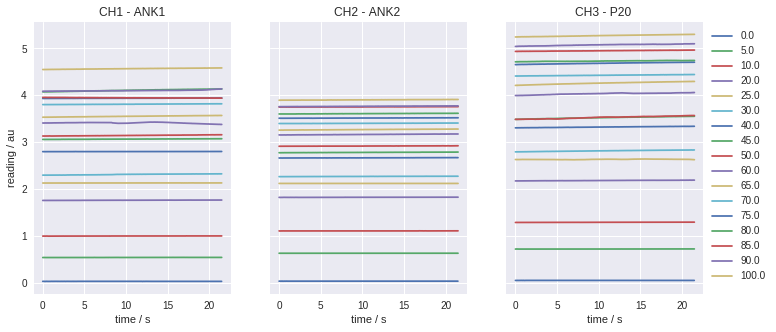

In [4]:
nums = ['100','90','85','80','75','70','65','60','50',
        '45','40','30','25','20','10','05','00']
nums=nums[::-1]
file_num = len(nums)

mean_read_ch1 = np.zeros(file_num)
std_read_ch1 = np.zeros(file_num)

mean_read_ch2 = np.zeros(file_num)
std_read_ch2 = np.zeros(file_num)

mean_read_ch3 = np.zeros(file_num)
std_read_ch3 = np.zeros(file_num)

fig, (ax0, ax1, ax2) = plt.subplots(1,3, figsize=(12,5), sharey=True)

for num, ii in zip(nums, range(file_num)):
    filepath = '../calibration_06jul19/%spc.mat' %num
    print(filepath)
    mat = sio.loadmat(filepath, squeeze_me=True)
    ch1 = mat['ch1']
    ch2 = mat['ch2']
    ch3 = mat['ch3']
    time = mat['time']
    nsamples = mat['nSamples']
    
    mean_read_ch1[ii] = np.mean(ch1)
    std_read_ch1[ii] = np.std(ch1)
    
    mean_read_ch2[ii] = np.mean(ch2)
    std_read_ch2[ii] = np.std(ch2)
    
    mean_read_ch3[ii] = np.mean(ch3)
    std_read_ch3[ii] = np.std(ch3)
    
    ax0.plot(time,ch1)
    ax1.plot(time,ch2)
    ax2.plot(time,ch3, label='%1.1f' %df.percentage[ii])
    
ax2.legend(bbox_to_anchor=(1,1))
ax0.set_ylabel('reading / au')
ax0.set_xlabel('time / s')
ax1.set_xlabel('time / s')
ax2.set_xlabel('time / s')
ax0.set_title('CH1 - ANK1')
ax1.set_title('CH2 - ANK2 ')
ax2.set_title('CH3 - P20 ')

ANK1
rho_1 = 0.998349+0.002087r+0.001721r^2+0.000050r^3 

ANK2
rho_2 = 0.997829+0.003691r+0.000034r^2+0.000560r^3 

Probe P
rho_P = 0.998074+0.001739r+0.001236r^2+0.000031r^3


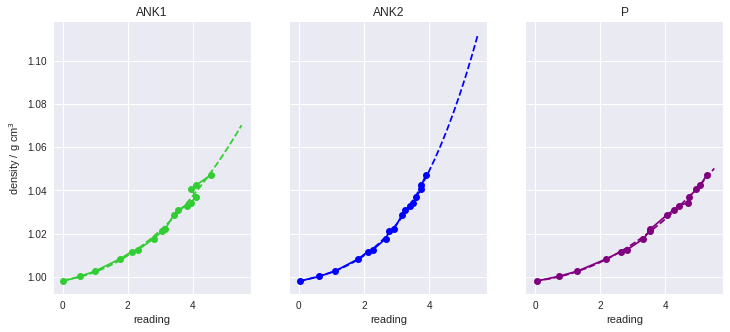

In [5]:
coef1, stats1 = P.polyfit(mean_read_ch1[:],np.array(df.density)[:],3,full=True)
coef2, stats2 = P.polyfit(mean_read_ch2[:],np.array(df.density)[:],3,full=True)
coefP, statsP = P.polyfit(mean_read_ch3[:],np.array(df.density)[:],3,full=True)

read_dummy = np.linspace(0,5.5,30)

fit1 = coef1[0]+(coef1[1]*read_dummy)+(coef1[2]*read_dummy**2) + (coef1[3]*read_dummy**3)
fit2 = coef2[0]+(coef2[1]*read_dummy)+(coef2[2]*read_dummy**2) + (coef2[3]*read_dummy**3)
fitP = coefP[0]+(coefP[1]*read_dummy)+(coefP[2]*read_dummy**2) + (coefP[3]*read_dummy**3)

fig, (ax0, ax1, ax2) = plt.subplots(1,3, figsize=(12,5), sharey=True)

ax0.errorbar(mean_read_ch1,df.density, xerr=std_read_ch1, marker='o', color='limegreen')
ax0.plot(read_dummy, fit1, '--',color='limegreen')

ax1.errorbar(mean_read_ch2,df.density, xerr=std_read_ch2, marker='o', color='blue')
ax1.plot(read_dummy, fit2, '--',color='blue')

ax2.errorbar(mean_read_ch3,df.density, xerr=std_read_ch3, marker='o', color='purple')
ax2.plot(read_dummy, fitP,'--', color='purple')

ax0.set_xlabel('reading')
ax0.set_ylabel('density / g cm$^3$')
ax1.set_xlabel('reading')
ax2.set_xlabel('reading')
ax0.set_title('ANK1')
ax1.set_title('ANK2')
ax2.set_title('P')


print('ANK1')
print('rho_1 = %f+%fr+%fr^2+%fr^3 \n' %(coef1[0], coef1[1], coef1[2], coef1[3]))

print('ANK2')
print('rho_2 = %f+%fr+%fr^2+%fr^3 \n' %(coef2[0], coef2[1], coef2[2], coef2[3]))

print('Probe P')
print('rho_P = %f+%fr+%fr^2+%fr^3' %(coefP[0], coefP[1], coefP[2], coefP[3]))